# Constructing Graph with Fixed Effects Regression

In [1]:
import pandas as pd
import numpy as np
economic_data = pd.read_excel("efw-2021-master-index-data-for-researchers.xlsx",
                              index_col = [1,0],
                              header = [0],
                              sheet_name = "EFW Panel Data 2021 Report")
economic_data.dropna(how = "all", axis = 1, inplace = True)
xlsx = pd.ExcelFile("mpd2020.xlsx")
gdp_data = pd.read_excel(xlsx, "Full data", index_col = [0,1], header = [0])
economic_data["RGDP per capita"] = economic_data.index.map(gdp_data["RGDP per capita"])
economic_data = economic_data.sort_values(["ISO", "Year"], ascending = (True, True))
economic_data = economic_data.drop(["Countries"], axis = 1).dropna(how = "any", axis = 0)

# difference RGDP per capita once
economic_data["RGDP per capita"] = economic_data["RGDP per capita"].groupby(level=0).diff().diff()
economic_data.dropna(inplace = True)
economic_data

ISO_Code   Summary  Size of Government  \
ISO Year                                           
AGO 2007      24.0  4.854972            5.520344   
    2008      24.0  4.877331            5.371626   
    2009      24.0  5.319136            7.454668   
    2010      24.0  5.386032            6.308737   
    2011      24.0  5.238731            6.153809   
...            ...       ...                 ...   
ZWE 2014     716.0  5.898573            6.773982   
    2015     716.0  6.339343            6.967275   
    2016     716.0  5.815715            5.332185   
    2017     716.0  5.191592            4.698293   
    2018     716.0  5.310210            4.378478   

          Legal System & Property Rights  Sound Money  \
ISO Year                                                
AGO 2007                        3.223210     4.453327   
    2008                        3.381772     5.032836   
    2009                        3.393677     5.238259   
    2010                        3.573554     5.570226   
    2011                        3.528577     5.671752   
...                                  ...          ...   
ZWE 2014                        3.930055     7.966798   
    2015                        4.108502     8.180178   
    2016                        4.056637     7.378648   
    2017                        4.071713     6.719400   
    2018                        4.042090     6.044910   

          Freedom to trade internationally  Regulation  RGDP per capita  
ISO Year                                                                 
AGO 2007                          5.632128    5.445851         297.6443  
    2008                          5.379912    5.220508        -211.0111  
    2009                          5.503781    5.005297        -626.3440  
    2010                          5.756330    5.721314          89.2058  
    2011                          5.777097    5.062418          62.2725  
...                                    ...         ...              ...  
ZWE 2014                          5.783920    5.038112         -10.0000  
    2015                          5.884012    6.556751         -24.0000  
    2016                          5.789575    6.521529           8.0000  
    2017                          4.068273    6.400282          74.3662  
    2018                          5.782070    6.303501         -19.3272  

[2849 rows x 8 columns]

In [2]:
countries = list(economic_data.groupby("ISO").mean().index)
for country in countries:
    economic_data[country]= 0
    economic_data[country].loc[country]=1
dep_vars = list(economic_data)[2:8]

/var/folders/sw/srw78v4s3x997zxm_2ygnk4r0000gn/T/ipykernel_12864/572488699.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  economic_data[country].loc[country]=1
/var/folders/sw/srw78v4s3x997zxm_2ygnk4r0000gn/T/ipykernel_12864/572488699.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  economic_data[country].loc[country]=1
/var/folders/sw/srw78v4s3x997zxm_2ygnk4r0000gn/T/ipykernel_12864/572488699.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

/var/folders/sw/srw78v4s3x997zxm_2ygnk4r0000gn/T/ipykernel_12864/572488699.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  economic_data[country].loc[country]=1
/var/folders/sw/srw78v4s3x997zxm_2ygnk4r0000gn/T/ipykernel_12864/572488699.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  economic_data[country].loc[country]=1
/var/folders/sw/srw78v4s3x997zxm_2ygnk4r0000gn/T/ipykernel_12864/572488699.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

/var/folders/sw/srw78v4s3x997zxm_2ygnk4r0000gn/T/ipykernel_12864/572488699.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  economic_data[country].loc[country]=1
/var/folders/sw/srw78v4s3x997zxm_2ygnk4r0000gn/T/ipykernel_12864/572488699.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  economic_data[country]= 0
/var/folders/sw/srw78v4s3x997zxm_2ygnk4r0000gn/T/ipykernel_12864/572488699.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

/var/folders/sw/srw78v4s3x997zxm_2ygnk4r0000gn/T/ipykernel_12864/572488699.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  economic_data[country].loc[country]=1
/var/folders/sw/srw78v4s3x997zxm_2ygnk4r0000gn/T/ipykernel_12864/572488699.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  economic_data[country]= 0
/var/folders/sw/srw78v4s3x997zxm_2ygnk4r0000gn/T/ipykernel_12864/572488699.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

/var/folders/sw/srw78v4s3x997zxm_2ygnk4r0000gn/T/ipykernel_12864/572488699.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  economic_data[country].loc[country]=1


In [3]:
# from pgmpy.independencies import Independencies
# independencies = Independencies()

# for country in countries:
#     ind = [c for c in countries if c != country]
#     independencies.add_assertions([country, ind])
# independencies

In [4]:
# example for developing residuals using entityt fixed effects

import statsmodels.api as sm
import copy as copy
df = economic_data.copy()
residuals = {}
for y_var in dep_vars:
    X_vars = copy.copy(dep_vars) + countries
    X_vars.remove(y_var)
    X = df[X_vars].copy()
    X["Constant"] = 1
    y = df[[y_var]]
    model = sm.OLS(y, X)
    results = model.fit()
    residuals[y_var] = results.resid
residuals = pd.DataFrame(residuals)
residuals

Size of Government  Legal System & Property Rights  Sound Money  \
ISO Year                                                                    
AGO 2007           -1.082201                       -0.126665    -1.557059   
    2008           -1.155056                        0.066197    -0.768312   
    2009            0.935719                        0.010510    -0.657400   
    2010           -0.436449                        0.093759    -0.824232   
    2011           -0.470055                        0.156192    -0.323872   
...                      ...                             ...          ...   
ZWE 2014            0.223883                       -0.314150     3.409938   
    2015            0.084422                       -0.403720     2.618261   
    2016           -1.497152                       -0.344173     2.013659   
    2017           -1.684412                       -0.150534     2.324685   
    2018           -2.374223                       -0.229900     0.881121   

          Freedom to trade internationally  Regulation  RGDP per capita  
ISO Year                                                                 
AGO 2007                          1.271638    0.437335       313.843411  
    2008                          0.949297    0.138765      -113.811375  
    2009                          0.332844   -0.395655      -597.213790  
    2010                          0.679255    0.336821       104.642429  
    2011                          0.902855   -0.305557       153.872471  
...                                    ...         ...              ...  
ZWE 2014                          0.254260   -0.824277        95.261289  
    2015                         -0.186728    0.576278       -69.257682  
    2016                          0.530820    0.898479        -1.723081  
    2017                         -0.767441    1.151712       176.657323  
    2018                          1.267759    1.003918       -42.138310  

[2849 rows x 6 columns]

In [5]:
def gen_error_terms(df, endog, entities):
    residuals = {}
    for y_var in endog:
        X_vars = list(endog) + entities
        X_vars.remove(y_var)
        X = df[X_vars].copy()
        X["Constant"] = 1
        y = df[[y_var]]
        residuals[y_var] = sm.OLS(y, X).fit().resid    
    return pd.DataFrame(residuals)



def map_residuals(df, dep_vars, entities):
    def check_remaining_controls(control_vars, residuals, x, y, controls_used) :
        for c_var in control_vars:
            # set c_used every time use cycle through a new control
            #  the program will then iterate through remaining controls
            #  until statistical significance is broken
            c_used = copy.copy(controls_used)
#             if y in residuals[x]:
            c_used.append(c_var)
            print(x,y, controls_used)
            residuals[tuple(i for i in c_used)] = gen_error_terms(df, dep_vars, entities)
            remaining_controls = copy.copy(control_vars)
            remaining_controls.remove(c_var)

            # recursive function that iterates through remaining variables 
            #  uses them as controls statistical significance holds without them,
            #  otherwise break
            check_remaining_controls(remaining_controls, residuals, x, y, c_used)
    residuals = {}
    
    for x in dep_vars:
#         ys = undirected_graph[x]
        for y in dep_vars:
            if x != y:
                residuals[x,y] = {}
                residuals[x,y][None] = gen_error_terms(df, dep_vars, entities)
                control_vars = [z for z in dep_vars if z != y and z != x]
                check_remaining_controls(control_vars, residuals[x,y], x, y, [])        

    return residuals

# build fully connected graph to pass to build_skeleton()


residuals = map_residuals(economic_data[dep_vars + countries], 
                          dep_vars, 
                          countries)
residuals

Size of Government Legal System & Property Rights []
Size of Government Legal System & Property Rights ['Sound Money']
Size of Government Legal System & Property Rights ['Sound Money', 'Freedom to trade internationally']
Size of Government Legal System & Property Rights ['Sound Money', 'Freedom to trade internationally', 'Regulation']
Size of Government Legal System & Property Rights ['Sound Money', 'Freedom to trade internationally']
Size of Government Legal System & Property Rights ['Sound Money', 'Freedom to trade internationally', 'RGDP per capita']
Size of Government Legal System & Property Rights ['Sound Money']
Size of Government Legal System & Property Rights ['Sound Money', 'Regulation']
Size of Government Legal System & Property Rights ['Sound Money', 'Regulation', 'Freedom to trade internationally']
Size of Government Legal System & Property Rights ['Sound Money', 'Regulation']
Size of Government Legal System & Property Rights ['Sound Money', 'Regulation', 'RGDP per capita']

Size of Government Sound Money ['Freedom to trade internationally', 'Regulation']
Size of Government Sound Money ['Freedom to trade internationally', 'Regulation', 'RGDP per capita']
Size of Government Sound Money ['Freedom to trade internationally']
Size of Government Sound Money ['Freedom to trade internationally', 'RGDP per capita']
Size of Government Sound Money ['Freedom to trade internationally', 'RGDP per capita', 'Legal System & Property Rights']
Size of Government Sound Money ['Freedom to trade internationally', 'RGDP per capita']
Size of Government Sound Money ['Freedom to trade internationally', 'RGDP per capita', 'Regulation']
Size of Government Sound Money []
Size of Government Sound Money ['Regulation']
Size of Government Sound Money ['Regulation', 'Legal System & Property Rights']
Size of Government Sound Money ['Regulation', 'Legal System & Property Rights', 'Freedom to trade internationally']
Size of Government Sound Money ['Regulation', 'Legal System & Property Rights

Size of Government Freedom to trade internationally ['RGDP per capita', 'Legal System & Property Rights', 'Regulation']
Size of Government Freedom to trade internationally ['RGDP per capita']
Size of Government Freedom to trade internationally ['RGDP per capita', 'Sound Money']
Size of Government Freedom to trade internationally ['RGDP per capita', 'Sound Money', 'Legal System & Property Rights']
Size of Government Freedom to trade internationally ['RGDP per capita', 'Sound Money']
Size of Government Freedom to trade internationally ['RGDP per capita', 'Sound Money', 'Regulation']
Size of Government Freedom to trade internationally ['RGDP per capita']
Size of Government Freedom to trade internationally ['RGDP per capita', 'Regulation']
Size of Government Freedom to trade internationally ['RGDP per capita', 'Regulation', 'Legal System & Property Rights']
Size of Government Freedom to trade internationally ['RGDP per capita', 'Regulation']
Size of Government Freedom to trade internationa

Size of Government RGDP per capita ['Sound Money', 'Legal System & Property Rights']
Size of Government RGDP per capita ['Sound Money', 'Legal System & Property Rights', 'Regulation']
Size of Government RGDP per capita ['Sound Money']
Size of Government RGDP per capita ['Sound Money', 'Freedom to trade internationally']
Size of Government RGDP per capita ['Sound Money', 'Freedom to trade internationally', 'Legal System & Property Rights']
Size of Government RGDP per capita ['Sound Money', 'Freedom to trade internationally']
Size of Government RGDP per capita ['Sound Money', 'Freedom to trade internationally', 'Regulation']
Size of Government RGDP per capita ['Sound Money']
Size of Government RGDP per capita ['Sound Money', 'Regulation']
Size of Government RGDP per capita ['Sound Money', 'Regulation', 'Legal System & Property Rights']
Size of Government RGDP per capita ['Sound Money', 'Regulation']
Size of Government RGDP per capita ['Sound Money', 'Regulation', 'Freedom to trade intern

Legal System & Property Rights Size of Government ['Regulation', 'RGDP per capita', 'Freedom to trade internationally']
Legal System & Property Rights Size of Government []
Legal System & Property Rights Size of Government ['RGDP per capita']
Legal System & Property Rights Size of Government ['RGDP per capita', 'Sound Money']
Legal System & Property Rights Size of Government ['RGDP per capita', 'Sound Money', 'Freedom to trade internationally']
Legal System & Property Rights Size of Government ['RGDP per capita', 'Sound Money']
Legal System & Property Rights Size of Government ['RGDP per capita', 'Sound Money', 'Regulation']
Legal System & Property Rights Size of Government ['RGDP per capita']
Legal System & Property Rights Size of Government ['RGDP per capita', 'Freedom to trade internationally']
Legal System & Property Rights Size of Government ['RGDP per capita', 'Freedom to trade internationally', 'Sound Money']
Legal System & Property Rights Size of Government ['RGDP per capita', 

Legal System & Property Rights Freedom to trade internationally ['Size of Government', 'Regulation', 'Sound Money']
Legal System & Property Rights Freedom to trade internationally ['Size of Government', 'Regulation']
Legal System & Property Rights Freedom to trade internationally ['Size of Government', 'Regulation', 'RGDP per capita']
Legal System & Property Rights Freedom to trade internationally ['Size of Government']
Legal System & Property Rights Freedom to trade internationally ['Size of Government', 'RGDP per capita']
Legal System & Property Rights Freedom to trade internationally ['Size of Government', 'RGDP per capita', 'Sound Money']
Legal System & Property Rights Freedom to trade internationally ['Size of Government', 'RGDP per capita']
Legal System & Property Rights Freedom to trade internationally ['Size of Government', 'RGDP per capita', 'Regulation']
Legal System & Property Rights Freedom to trade internationally []
Legal System & Property Rights Freedom to trade internat

Legal System & Property Rights Regulation ['Sound Money', 'RGDP per capita', 'Size of Government']
Legal System & Property Rights Regulation ['Sound Money', 'RGDP per capita']
Legal System & Property Rights Regulation ['Sound Money', 'RGDP per capita', 'Freedom to trade internationally']
Legal System & Property Rights Regulation []
Legal System & Property Rights Regulation ['Freedom to trade internationally']
Legal System & Property Rights Regulation ['Freedom to trade internationally', 'Size of Government']
Legal System & Property Rights Regulation ['Freedom to trade internationally', 'Size of Government', 'Sound Money']
Legal System & Property Rights Regulation ['Freedom to trade internationally', 'Size of Government']
Legal System & Property Rights Regulation ['Freedom to trade internationally', 'Size of Government', 'RGDP per capita']
Legal System & Property Rights Regulation ['Freedom to trade internationally']
Legal System & Property Rights Regulation ['Freedom to trade internati

Legal System & Property Rights RGDP per capita ['Regulation']
Legal System & Property Rights RGDP per capita ['Regulation', 'Sound Money']
Legal System & Property Rights RGDP per capita ['Regulation', 'Sound Money', 'Size of Government']
Legal System & Property Rights RGDP per capita ['Regulation', 'Sound Money']
Legal System & Property Rights RGDP per capita ['Regulation', 'Sound Money', 'Freedom to trade internationally']
Legal System & Property Rights RGDP per capita ['Regulation']
Legal System & Property Rights RGDP per capita ['Regulation', 'Freedom to trade internationally']
Legal System & Property Rights RGDP per capita ['Regulation', 'Freedom to trade internationally', 'Size of Government']
Legal System & Property Rights RGDP per capita ['Regulation', 'Freedom to trade internationally']
Legal System & Property Rights RGDP per capita ['Regulation', 'Freedom to trade internationally', 'Sound Money']
Sound Money Size of Government []
Sound Money Size of Government ['Legal System &

Sound Money Legal System & Property Rights ['Freedom to trade internationally', 'Size of Government', 'RGDP per capita']
Sound Money Legal System & Property Rights ['Freedom to trade internationally']
Sound Money Legal System & Property Rights ['Freedom to trade internationally', 'Regulation']
Sound Money Legal System & Property Rights ['Freedom to trade internationally', 'Regulation', 'Size of Government']
Sound Money Legal System & Property Rights ['Freedom to trade internationally', 'Regulation']
Sound Money Legal System & Property Rights ['Freedom to trade internationally', 'Regulation', 'RGDP per capita']
Sound Money Legal System & Property Rights ['Freedom to trade internationally']
Sound Money Legal System & Property Rights ['Freedom to trade internationally', 'RGDP per capita']
Sound Money Legal System & Property Rights ['Freedom to trade internationally', 'RGDP per capita', 'Size of Government']
Sound Money Legal System & Property Rights ['Freedom to trade internationally', 'R

Sound Money Freedom to trade internationally ['Regulation', 'RGDP per capita', 'Legal System & Property Rights']
Sound Money Freedom to trade internationally []
Sound Money Freedom to trade internationally ['RGDP per capita']
Sound Money Freedom to trade internationally ['RGDP per capita', 'Size of Government']
Sound Money Freedom to trade internationally ['RGDP per capita', 'Size of Government', 'Legal System & Property Rights']
Sound Money Freedom to trade internationally ['RGDP per capita', 'Size of Government']
Sound Money Freedom to trade internationally ['RGDP per capita', 'Size of Government', 'Regulation']
Sound Money Freedom to trade internationally ['RGDP per capita']
Sound Money Freedom to trade internationally ['RGDP per capita', 'Legal System & Property Rights']
Sound Money Freedom to trade internationally ['RGDP per capita', 'Legal System & Property Rights', 'Size of Government']
Sound Money Freedom to trade internationally ['RGDP per capita', 'Legal System & Property Rig

Sound Money RGDP per capita ['Legal System & Property Rights', 'Size of Government', 'Freedom to trade internationally']
Sound Money RGDP per capita ['Legal System & Property Rights', 'Size of Government']
Sound Money RGDP per capita ['Legal System & Property Rights', 'Size of Government', 'Regulation']
Sound Money RGDP per capita ['Legal System & Property Rights']
Sound Money RGDP per capita ['Legal System & Property Rights', 'Freedom to trade internationally']
Sound Money RGDP per capita ['Legal System & Property Rights', 'Freedom to trade internationally', 'Size of Government']
Sound Money RGDP per capita ['Legal System & Property Rights', 'Freedom to trade internationally']
Sound Money RGDP per capita ['Legal System & Property Rights', 'Freedom to trade internationally', 'Regulation']
Sound Money RGDP per capita ['Legal System & Property Rights']
Sound Money RGDP per capita ['Legal System & Property Rights', 'Regulation']
Sound Money RGDP per capita ['Legal System & Property Rights

Freedom to trade internationally Size of Government ['Regulation', 'RGDP per capita']
Freedom to trade internationally Size of Government ['Regulation', 'RGDP per capita', 'Sound Money']
Freedom to trade internationally Size of Government []
Freedom to trade internationally Size of Government ['RGDP per capita']
Freedom to trade internationally Size of Government ['RGDP per capita', 'Legal System & Property Rights']
Freedom to trade internationally Size of Government ['RGDP per capita', 'Legal System & Property Rights', 'Sound Money']
Freedom to trade internationally Size of Government ['RGDP per capita', 'Legal System & Property Rights']
Freedom to trade internationally Size of Government ['RGDP per capita', 'Legal System & Property Rights', 'Regulation']
Freedom to trade internationally Size of Government ['RGDP per capita']
Freedom to trade internationally Size of Government ['RGDP per capita', 'Sound Money']
Freedom to trade internationally Size of Government ['RGDP per capita', 'S

Freedom to trade internationally Sound Money ['Size of Government']
Freedom to trade internationally Sound Money ['Size of Government', 'Legal System & Property Rights']
Freedom to trade internationally Sound Money ['Size of Government', 'Legal System & Property Rights', 'Regulation']
Freedom to trade internationally Sound Money ['Size of Government', 'Legal System & Property Rights']
Freedom to trade internationally Sound Money ['Size of Government', 'Legal System & Property Rights', 'RGDP per capita']
Freedom to trade internationally Sound Money ['Size of Government']
Freedom to trade internationally Sound Money ['Size of Government', 'Regulation']
Freedom to trade internationally Sound Money ['Size of Government', 'Regulation', 'Legal System & Property Rights']
Freedom to trade internationally Sound Money ['Size of Government', 'Regulation']
Freedom to trade internationally Sound Money ['Size of Government', 'Regulation', 'RGDP per capita']
Freedom to trade internationally Sound Mon

Freedom to trade internationally Regulation ['Legal System & Property Rights', 'Sound Money', 'RGDP per capita']
Freedom to trade internationally Regulation ['Legal System & Property Rights']
Freedom to trade internationally Regulation ['Legal System & Property Rights', 'RGDP per capita']
Freedom to trade internationally Regulation ['Legal System & Property Rights', 'RGDP per capita', 'Size of Government']
Freedom to trade internationally Regulation ['Legal System & Property Rights', 'RGDP per capita']
Freedom to trade internationally Regulation ['Legal System & Property Rights', 'RGDP per capita', 'Sound Money']
Freedom to trade internationally Regulation []
Freedom to trade internationally Regulation ['Sound Money']
Freedom to trade internationally Regulation ['Sound Money', 'Size of Government']
Freedom to trade internationally Regulation ['Sound Money', 'Size of Government', 'Legal System & Property Rights']
Freedom to trade internationally Regulation ['Sound Money', 'Size of Gover

Freedom to trade internationally RGDP per capita ['Regulation', 'Size of Government', 'Legal System & Property Rights']
Freedom to trade internationally RGDP per capita ['Regulation', 'Size of Government']
Freedom to trade internationally RGDP per capita ['Regulation', 'Size of Government', 'Sound Money']
Freedom to trade internationally RGDP per capita ['Regulation']
Freedom to trade internationally RGDP per capita ['Regulation', 'Legal System & Property Rights']
Freedom to trade internationally RGDP per capita ['Regulation', 'Legal System & Property Rights', 'Size of Government']
Freedom to trade internationally RGDP per capita ['Regulation', 'Legal System & Property Rights']
Freedom to trade internationally RGDP per capita ['Regulation', 'Legal System & Property Rights', 'Sound Money']
Freedom to trade internationally RGDP per capita ['Regulation']
Freedom to trade internationally RGDP per capita ['Regulation', 'Sound Money']
Freedom to trade internationally RGDP per capita ['Regula

Regulation Legal System & Property Rights ['Sound Money', 'Size of Government']
Regulation Legal System & Property Rights ['Sound Money', 'Size of Government', 'Freedom to trade internationally']
Regulation Legal System & Property Rights ['Sound Money', 'Size of Government']
Regulation Legal System & Property Rights ['Sound Money', 'Size of Government', 'RGDP per capita']
Regulation Legal System & Property Rights ['Sound Money']
Regulation Legal System & Property Rights ['Sound Money', 'Freedom to trade internationally']
Regulation Legal System & Property Rights ['Sound Money', 'Freedom to trade internationally', 'Size of Government']
Regulation Legal System & Property Rights ['Sound Money', 'Freedom to trade internationally']
Regulation Legal System & Property Rights ['Sound Money', 'Freedom to trade internationally', 'RGDP per capita']
Regulation Legal System & Property Rights ['Sound Money']
Regulation Legal System & Property Rights ['Sound Money', 'RGDP per capita']
Regulation Lega

Regulation Sound Money []
Regulation Sound Money ['RGDP per capita']
Regulation Sound Money ['RGDP per capita', 'Size of Government']
Regulation Sound Money ['RGDP per capita', 'Size of Government', 'Legal System & Property Rights']
Regulation Sound Money ['RGDP per capita', 'Size of Government']
Regulation Sound Money ['RGDP per capita', 'Size of Government', 'Freedom to trade internationally']
Regulation Sound Money ['RGDP per capita']
Regulation Sound Money ['RGDP per capita', 'Legal System & Property Rights']
Regulation Sound Money ['RGDP per capita', 'Legal System & Property Rights', 'Size of Government']
Regulation Sound Money ['RGDP per capita', 'Legal System & Property Rights']
Regulation Sound Money ['RGDP per capita', 'Legal System & Property Rights', 'Freedom to trade internationally']
Regulation Sound Money ['RGDP per capita']
Regulation Sound Money ['RGDP per capita', 'Freedom to trade internationally']
Regulation Sound Money ['RGDP per capita', 'Freedom to trade internati

Regulation RGDP per capita ['Size of Government', 'Freedom to trade internationally', 'Sound Money']
Regulation RGDP per capita []
Regulation RGDP per capita ['Legal System & Property Rights']
Regulation RGDP per capita ['Legal System & Property Rights', 'Size of Government']
Regulation RGDP per capita ['Legal System & Property Rights', 'Size of Government', 'Sound Money']
Regulation RGDP per capita ['Legal System & Property Rights', 'Size of Government']
Regulation RGDP per capita ['Legal System & Property Rights', 'Size of Government', 'Freedom to trade internationally']
Regulation RGDP per capita ['Legal System & Property Rights']
Regulation RGDP per capita ['Legal System & Property Rights', 'Sound Money']
Regulation RGDP per capita ['Legal System & Property Rights', 'Sound Money', 'Size of Government']
Regulation RGDP per capita ['Legal System & Property Rights', 'Sound Money']
Regulation RGDP per capita ['Legal System & Property Rights', 'Sound Money', 'Freedom to trade internatio

RGDP per capita Size of Government ['Freedom to trade internationally', 'Regulation']
RGDP per capita Size of Government ['Freedom to trade internationally', 'Regulation', 'Sound Money']
RGDP per capita Size of Government []
RGDP per capita Size of Government ['Regulation']
RGDP per capita Size of Government ['Regulation', 'Legal System & Property Rights']
RGDP per capita Size of Government ['Regulation', 'Legal System & Property Rights', 'Sound Money']
RGDP per capita Size of Government ['Regulation', 'Legal System & Property Rights']
RGDP per capita Size of Government ['Regulation', 'Legal System & Property Rights', 'Freedom to trade internationally']
RGDP per capita Size of Government ['Regulation']
RGDP per capita Size of Government ['Regulation', 'Sound Money']
RGDP per capita Size of Government ['Regulation', 'Sound Money', 'Legal System & Property Rights']
RGDP per capita Size of Government ['Regulation', 'Sound Money']
RGDP per capita Size of Government ['Regulation', 'Sound Mo

RGDP per capita Sound Money ['Size of Government', 'Freedom to trade internationally', 'Regulation']
RGDP per capita Sound Money ['Size of Government']
RGDP per capita Sound Money ['Size of Government', 'Regulation']
RGDP per capita Sound Money ['Size of Government', 'Regulation', 'Legal System & Property Rights']
RGDP per capita Sound Money ['Size of Government', 'Regulation']
RGDP per capita Sound Money ['Size of Government', 'Regulation', 'Freedom to trade internationally']
RGDP per capita Sound Money []
RGDP per capita Sound Money ['Legal System & Property Rights']
RGDP per capita Sound Money ['Legal System & Property Rights', 'Size of Government']
RGDP per capita Sound Money ['Legal System & Property Rights', 'Size of Government', 'Freedom to trade internationally']
RGDP per capita Sound Money ['Legal System & Property Rights', 'Size of Government']
RGDP per capita Sound Money ['Legal System & Property Rights', 'Size of Government', 'Regulation']
RGDP per capita Sound Money ['Lega

RGDP per capita Freedom to trade internationally ['Sound Money', 'Legal System & Property Rights']
RGDP per capita Freedom to trade internationally ['Sound Money', 'Legal System & Property Rights', 'Size of Government']
RGDP per capita Freedom to trade internationally ['Sound Money', 'Legal System & Property Rights']
RGDP per capita Freedom to trade internationally ['Sound Money', 'Legal System & Property Rights', 'Regulation']
RGDP per capita Freedom to trade internationally ['Sound Money']
RGDP per capita Freedom to trade internationally ['Sound Money', 'Regulation']
RGDP per capita Freedom to trade internationally ['Sound Money', 'Regulation', 'Size of Government']
RGDP per capita Freedom to trade internationally ['Sound Money', 'Regulation']
RGDP per capita Freedom to trade internationally ['Sound Money', 'Regulation', 'Legal System & Property Rights']
RGDP per capita Freedom to trade internationally []
RGDP per capita Freedom to trade internationally ['Regulation']
RGDP per capita

{('Size of Government',
  'Legal System & Property Rights'): {None:           Size of Government  Legal System & Property Rights  Sound Money  \
  ISO Year                                                                    
  AGO 2007           -1.082201                       -0.126665    -1.557059   
      2008           -1.155056                        0.066197    -0.768312   
      2009            0.935719                        0.010510    -0.657400   
      2010           -0.436449                        0.093759    -0.824232   
      2011           -0.470055                        0.156192    -0.323872   
  ...                      ...                             ...          ...   
  ZWE 2014            0.223883                       -0.314150     3.409938   
      2015            0.084422                       -0.403720     2.618261   
      2016           -1.497152                       -0.344173     2.013659   
      2017           -1.684412                       -0.150534   

In [6]:
import pingouin
def build_skeleton_from_residuals(residuals, undirected_graph, dep_vars, p_val):
    def check_remaining_controls(control_vars, residuals, undirected_graph, x, y, controls_used) :
        for c_var in control_vars:
            # set c_used every time use cycle through a new control
            #  the program will then iterate through remaining controls
            #  until statistical significance is broken
            c_used = copy.copy(controls_used)
            if y in undirected_graph[x]:
                c_used.append(c_var)
                print(x,y, controls_used)
                test = residuals[tuple(i for i in c_used)].partial_corr(x = x, y = y, covar=None,
                                      method = "pearson")
                if test["p-val"].values[0] > p_val: 

                    undirected_graph[x].remove(y)
                    break
                else:
                    remaining_controls = copy.copy(control_vars)
                    remaining_controls.remove(c_var)

                    # recursive function that iterates through remaining variables 
                    #  uses them as controls statistical significance holds without them,
                    #  otherwise break
                    check_remaining_controls(remaining_controls, residuals, undirected_graph, x, y, c_used)

    for x in dep_vars:
        ys = undirected_graph[x]
        for y in dep_vars:
            if x != y:
                test = residuals[x,y][None].partial_corr(x=x, 
                                       y=y, 
                                       covar = None,
                                      method = "pearson")
                if test["p-val"].values[0] > p_val:
                    undirected_graph[x].remove(y)
                else:
                    control_vars = [z for z in dep_vars if z != y and z != x]
                    check_remaining_controls(control_vars, residuals[x,y], undirected_graph, x, y, [])
    return undirected_graph
p_val = .05
undirected_graph = {key:[] for key in dep_vars}
for x in undirected_graph:
    undirected_graph[x] = [y for y in dep_vars if y != x]
undirected_graph = build_skeleton_from_residuals(residuals, undirected_graph, dep_vars, p_val = p_val)     
undirected_graph
# residuals[("Size of Government", "Sound Money")].keys()

Size of Government Legal System & Property Rights []
Size of Government Legal System & Property Rights ['Sound Money']
Size of Government Legal System & Property Rights ['Sound Money', 'Freedom to trade internationally']
Size of Government Legal System & Property Rights ['Sound Money', 'Freedom to trade internationally', 'Regulation']
Size of Government Legal System & Property Rights ['Sound Money', 'Freedom to trade internationally']
Size of Government Legal System & Property Rights ['Sound Money', 'Freedom to trade internationally', 'RGDP per capita']
Size of Government Legal System & Property Rights ['Sound Money']
Size of Government Legal System & Property Rights ['Sound Money', 'Regulation']
Size of Government Legal System & Property Rights ['Sound Money', 'Regulation', 'Freedom to trade internationally']
Size of Government Legal System & Property Rights ['Sound Money', 'Regulation']
Size of Government Legal System & Property Rights ['Sound Money', 'Regulation', 'RGDP per capita']

/Users/isaacdubovoy/opt/anaconda3/envs/myenvr/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.1, the latest is 0.5.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


 Sound Money ['Freedom to trade internationally']
Size of Government Sound Money ['Freedom to trade internationally', 'Regulation']
Size of Government Sound Money ['Freedom to trade internationally', 'Regulation', 'Legal System & Property Rights']
Size of Government Sound Money ['Freedom to trade internationally', 'Regulation']
Size of Government Sound Money ['Freedom to trade internationally', 'Regulation', 'RGDP per capita']
Size of Government Sound Money ['Freedom to trade internationally']
Size of Government Sound Money ['Freedom to trade internationally', 'RGDP per capita']
Size of Government Sound Money ['Freedom to trade internationally', 'RGDP per capita', 'Legal System & Property Rights']
Size of Government Sound Money ['Freedom to trade internationally', 'RGDP per capita']
Size of Government Sound Money ['Freedom to trade internationally', 'RGDP per capita', 'Regulation']
Size of Government Sound Money []
Size of Government Sound Money ['Regulation']
Size of Government Sound 

Size of Government Regulation ['Sound Money']
Size of Government Regulation ['Sound Money', 'RGDP per capita']
Size of Government Regulation ['Sound Money', 'RGDP per capita', 'Legal System & Property Rights']
Size of Government Regulation ['Sound Money', 'RGDP per capita']
Size of Government Regulation ['Sound Money', 'RGDP per capita', 'Freedom to trade internationally']
Size of Government Regulation []
Size of Government Regulation ['Freedom to trade internationally']
Size of Government Regulation ['Freedom to trade internationally', 'Legal System & Property Rights']
Size of Government Regulation ['Freedom to trade internationally', 'Legal System & Property Rights', 'Sound Money']
Size of Government Regulation ['Freedom to trade internationally', 'Legal System & Property Rights']
Size of Government Regulation ['Freedom to trade internationally', 'Legal System & Property Rights', 'RGDP per capita']
Size of Government Regulation ['Freedom to trade internationally']
Size of Government 

Legal System & Property Rights Sound Money ['Regulation']
Legal System & Property Rights Sound Money ['Regulation', 'Freedom to trade internationally']
Legal System & Property Rights Sound Money ['Regulation', 'Freedom to trade internationally', 'Size of Government']
Legal System & Property Rights Sound Money ['Regulation', 'Freedom to trade internationally']
Legal System & Property Rights Sound Money ['Regulation', 'Freedom to trade internationally', 'RGDP per capita']
Legal System & Property Rights Sound Money ['Regulation']
Legal System & Property Rights Sound Money ['Regulation', 'RGDP per capita']
Legal System & Property Rights Sound Money ['Regulation', 'RGDP per capita', 'Size of Government']
Legal System & Property Rights Sound Money ['Regulation', 'RGDP per capita']
Legal System & Property Rights Sound Money ['Regulation', 'RGDP per capita', 'Freedom to trade internationally']
Legal System & Property Rights Sound Money []
Legal System & Property Rights Sound Money ['RGDP per c

Legal System & Property Rights Regulation ['Freedom to trade internationally', 'RGDP per capita']
Legal System & Property Rights Regulation ['Freedom to trade internationally', 'RGDP per capita', 'Sound Money']
Legal System & Property Rights Regulation []
Legal System & Property Rights Regulation ['RGDP per capita']
Legal System & Property Rights Regulation ['RGDP per capita', 'Size of Government']
Legal System & Property Rights Regulation ['RGDP per capita', 'Size of Government', 'Sound Money']
Legal System & Property Rights Regulation ['RGDP per capita', 'Size of Government']
Legal System & Property Rights Regulation ['RGDP per capita', 'Size of Government', 'Freedom to trade internationally']
Legal System & Property Rights Regulation ['RGDP per capita']
Legal System & Property Rights Regulation ['RGDP per capita', 'Sound Money']
Legal System & Property Rights Regulation ['RGDP per capita', 'Sound Money', 'Size of Government']
Legal System & Property Rights Regulation ['RGDP per capi

Sound Money Legal System & Property Rights ['Regulation']
Sound Money Legal System & Property Rights ['Regulation', 'RGDP per capita']
Sound Money Legal System & Property Rights ['Regulation', 'RGDP per capita', 'Size of Government']
Sound Money Legal System & Property Rights ['Regulation', 'RGDP per capita']
Sound Money Legal System & Property Rights ['Regulation', 'RGDP per capita', 'Freedom to trade internationally']
Sound Money Legal System & Property Rights []
Sound Money Legal System & Property Rights ['RGDP per capita']
Sound Money Legal System & Property Rights ['RGDP per capita', 'Size of Government']
Sound Money Legal System & Property Rights ['RGDP per capita', 'Size of Government', 'Freedom to trade internationally']
Sound Money Legal System & Property Rights ['RGDP per capita', 'Size of Government']
Sound Money Legal System & Property Rights ['RGDP per capita', 'Size of Government', 'Regulation']
Sound Money Legal System & Property Rights ['RGDP per capita']
Sound Money Le

Sound Money Regulation ['RGDP per capita', 'Size of Government']
Sound Money Regulation ['RGDP per capita', 'Size of Government', 'Freedom to trade internationally']
Sound Money Regulation ['RGDP per capita']
Sound Money Regulation ['RGDP per capita', 'Legal System & Property Rights']
Sound Money Regulation ['RGDP per capita', 'Legal System & Property Rights', 'Size of Government']
Sound Money Regulation ['RGDP per capita', 'Legal System & Property Rights']
Sound Money Regulation ['RGDP per capita', 'Legal System & Property Rights', 'Freedom to trade internationally']
Sound Money Regulation ['RGDP per capita']
Sound Money Regulation ['RGDP per capita', 'Freedom to trade internationally']
Sound Money Regulation ['RGDP per capita', 'Freedom to trade internationally', 'Size of Government']
Sound Money Regulation ['RGDP per capita', 'Freedom to trade internationally']
Sound Money Regulation ['RGDP per capita', 'Freedom to trade internationally', 'Legal System & Property Rights']
Sound Mone

Freedom to trade internationally Size of Government ['RGDP per capita', 'Regulation', 'Sound Money']
Freedom to trade internationally Legal System & Property Rights []
Freedom to trade internationally Legal System & Property Rights ['Size of Government']
Freedom to trade internationally Legal System & Property Rights ['Size of Government', 'Sound Money']
Freedom to trade internationally Legal System & Property Rights ['Size of Government', 'Sound Money', 'Regulation']
Freedom to trade internationally Legal System & Property Rights ['Size of Government', 'Sound Money']
Freedom to trade internationally Legal System & Property Rights ['Size of Government', 'Sound Money', 'RGDP per capita']
Freedom to trade internationally Legal System & Property Rights ['Size of Government']
Freedom to trade internationally Legal System & Property Rights ['Size of Government', 'Regulation']
Freedom to trade internationally Legal System & Property Rights ['Size of Government', 'Regulation', 'Sound Money']


Freedom to trade internationally Sound Money ['RGDP per capita', 'Size of Government']
Freedom to trade internationally Sound Money ['RGDP per capita', 'Size of Government', 'Regulation']
Freedom to trade internationally Sound Money ['RGDP per capita']
Freedom to trade internationally Sound Money ['RGDP per capita', 'Legal System & Property Rights']
Freedom to trade internationally Sound Money ['RGDP per capita', 'Legal System & Property Rights', 'Size of Government']
Freedom to trade internationally Sound Money ['RGDP per capita', 'Legal System & Property Rights']
Freedom to trade internationally Sound Money ['RGDP per capita', 'Legal System & Property Rights', 'Regulation']
Freedom to trade internationally Sound Money ['RGDP per capita']
Freedom to trade internationally Sound Money ['RGDP per capita', 'Regulation']
Freedom to trade internationally Sound Money ['RGDP per capita', 'Regulation', 'Size of Government']
Freedom to trade internationally Sound Money ['RGDP per capita', 'Regu

Regulation Size of Government ['RGDP per capita', 'Freedom to trade internationally', 'Legal System & Property Rights']
Regulation Size of Government ['RGDP per capita', 'Freedom to trade internationally']
Regulation Size of Government ['RGDP per capita', 'Freedom to trade internationally', 'Sound Money']
Regulation Legal System & Property Rights []
Regulation Legal System & Property Rights ['Size of Government']
Regulation Legal System & Property Rights ['Size of Government', 'Sound Money']
Regulation Legal System & Property Rights ['Size of Government', 'Sound Money', 'Freedom to trade internationally']
Regulation Legal System & Property Rights ['Size of Government', 'Sound Money']
Regulation Legal System & Property Rights ['Size of Government', 'Sound Money', 'RGDP per capita']
Regulation Legal System & Property Rights ['Size of Government']
Regulation Legal System & Property Rights ['Size of Government', 'Freedom to trade internationally']
Regulation Legal System & Property Rights 

Regulation Sound Money ['RGDP per capita', 'Freedom to trade internationally']
Regulation Sound Money ['RGDP per capita', 'Freedom to trade internationally', 'Legal System & Property Rights']
Regulation Freedom to trade internationally []
Regulation Freedom to trade internationally ['Size of Government']
Regulation Freedom to trade internationally ['Size of Government', 'Legal System & Property Rights']
Regulation Freedom to trade internationally ['Size of Government', 'Legal System & Property Rights', 'Sound Money']
Regulation Freedom to trade internationally ['Size of Government', 'Legal System & Property Rights']
Regulation Freedom to trade internationally ['Size of Government', 'Legal System & Property Rights', 'RGDP per capita']
Regulation Freedom to trade internationally ['Size of Government']
Regulation Freedom to trade internationally ['Size of Government', 'Sound Money']
Regulation Freedom to trade internationally ['Size of Government', 'Sound Money', 'Legal System & Property 

{'Size of Government': ['Legal System & Property Rights',
  'Sound Money',
  'Freedom to trade internationally',
  'Regulation'],
 'Legal System & Property Rights': ['Size of Government',
  'Sound Money',
  'Freedom to trade internationally',
  'Regulation'],
 'Sound Money': ['Size of Government',
  'Legal System & Property Rights',
  'Freedom to trade internationally',
  'Regulation',
  'RGDP per capita'],
 'Freedom to trade internationally': ['Size of Government',
  'Legal System & Property Rights',
  'Sound Money',
  'Regulation'],
 'Regulation': ['Size of Government',
  'Legal System & Property Rights',
  'Sound Money',
  'Freedom to trade internationally'],
 'RGDP per capita': ['Sound Money']}

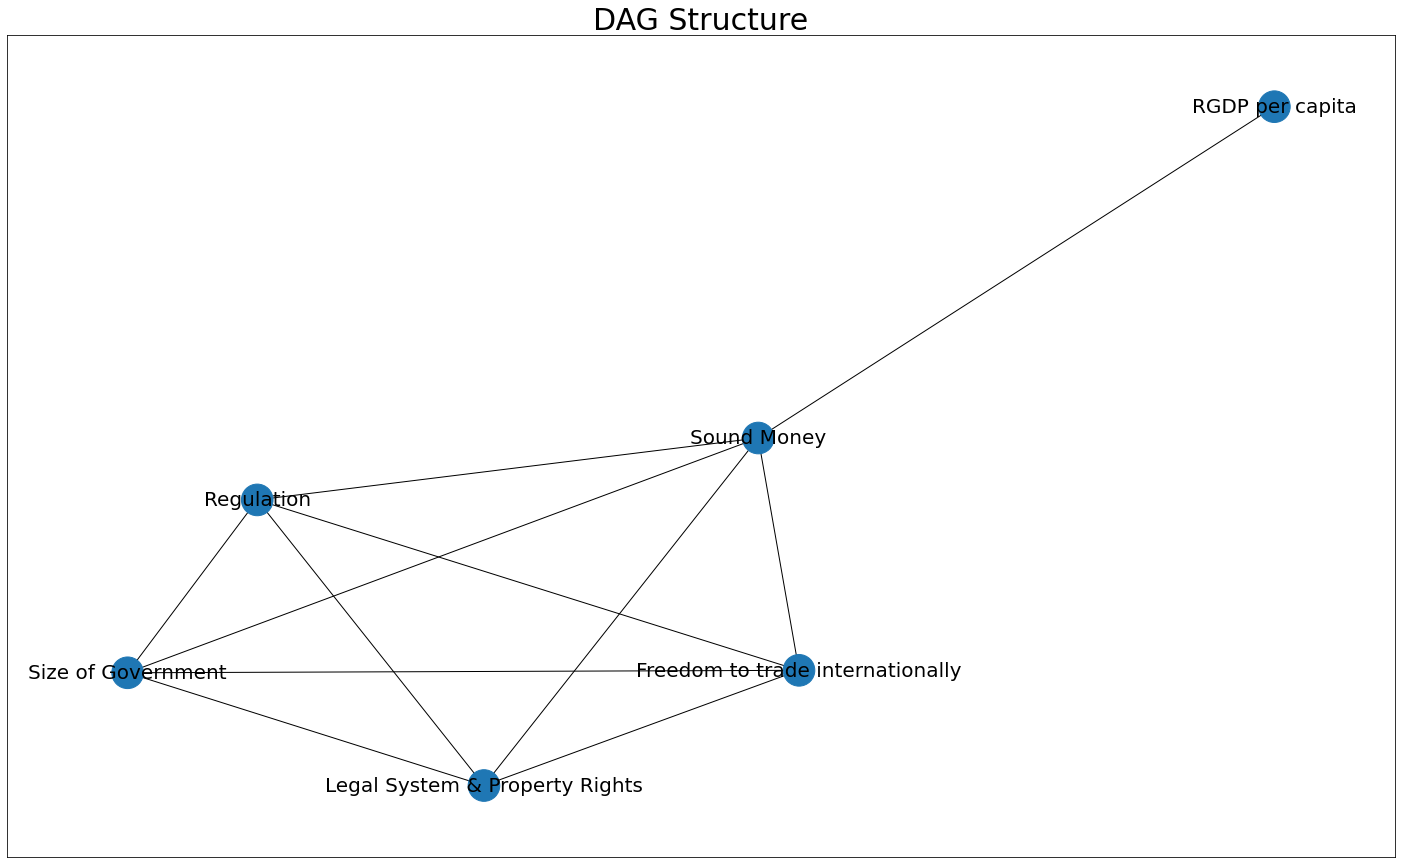

In [7]:
import matplotlib.pyplot as plt
import networkx as nx

def graph_DAG(undirected_graph, df, title = "DAG Structure"):
    pcorr_matrix = df.pcorr()
    graph= nx.Graph()
    edges = []
    edge_labels = {}
    for key in undirected_graph:
        for key2 in undirected_graph[key]:
            if (key2, key) not in edges:
                edge = (key, key2)
                edges.append(edge)
#                 edge_labels[edge] = str(round(pcorr_matrix.loc[key][key2], 2))
    
    graph.add_edges_from(edges)
    color_map = ["C0" for g in graph]
    
    fig, ax = plt.subplots(figsize = (20,12))
    graph.nodes()
    plt.tight_layout()
    pos = nx.spring_layout(graph)
    plt.title(title, fontsize = 30)
    nx.draw_networkx(graph, 
                     pos, 
                     node_color = color_map,
                     node_size=1000,
                    # show node label
                     with_labels = True,
                     arrows = False,
                     font_size = 20,
                     alpha = 1,
                     font_color = "k",
                     ax = ax)
#     nx.draw_networkx_edge_labels(graph,
#                                  pos,
#                                 edge_labels = edge_labels,
#                                  font_color = "green",
#                                  font_size=20)    
    
    plt.show()
    
graph_DAG(undirected_graph, economic_data)

In [ ]:
from pgmpy.estimators import PC
from pgmpy.independencies import Independencies
# ind = Independencies(example_set).closure()
c = PC(economic_data)
max_cond_vars = len(economic_data.keys()) - 2
# max_cond_vars = 6

model = c.estimate(return_type = "dag",variant= "parallel",#"orig", "stable"
                   significance_level = 0.5, 
                   max_cond_vars = max_cond_vars, ci_test = "independence_match")
edges = model.edges()
edges

In [ ]:
from matplotlib.patches import ArrowStyle
import networkx as nx
import matplotlib.pyplot as plt

def graph_DAG(edges, df, title = ""):
    graph = nx.DiGraph()
    graph.add_edges_from(edges)
    color_map = ["C0" for g in graph]

    fig, ax = plt.subplots(figsize = (20,12))
    graph.nodes()
    plt.tight_layout()
    pos = nx.spring_layout(graph)#, k = 5/(len(sig_corr.keys())**.5))

    plt.title(title, fontsize = 30)
    nx.draw_networkx(graph, pos, node_color=color_map, node_size = 1200,
                     with_labels=True,  arrows=True,
                     font_color = "black",
                     font_size = 26, alpha = 1,
                     width = 1, edge_color = "C1",
                     arrowstyle=ArrowStyle("Fancy, head_length=3, head_width=1.5, tail_width=.1"), ax = ax)

graph_DAG(edges, economic_data, title = "Directed Acyclic Graph")
edges

In [8]:
break

SyntaxError: 'break' outside loop (668683560.py, line 1)

In [ ]:
economic_data_AGO_USA_ZWE = economic_data.loc[["AGO", "USA", "ZWE"], :].reset_index().drop(columns = ["ISO", "Year", "ISO_Code", "Summary"])
economic_data_AGO_USA_ZWE = economic_data_AGO_USA_ZWE[["Size of Government", "Legal System & Property Rights",
                                                      "Sound Money", "Freedom to trade internationally","Regulation",
                                                      "RGDP per capita", "AGO", "USA", "ZWE" ]]
economic_data_AGO_USA_ZWE

In [ ]:
economic_data = economic_data = economic_data.reset_index().drop(columns = ["ISO", "Year", "ISO_Code", "Summary"])
economic_data

In [ ]:
set_ex = {"1", "2", "3", "4", "5", "6", "7", "8"}
set_ex

In [ ]:
for i, j in set_ex:
    if i == j:
        print(i)

In [ ]:
# undirected_graph = {[key:[]] for key in set_ex}
undirected_graph_1 = [["7", ] for j in range(6)]
undirected_graph_2 = [["8"] for j in range(6)]
undirected_graph = undirected_graph_1 + undirected_graph_2
countries = {"7", "8"}
# for x in undirected_graph:
#     remaining_vars = [y for y in set_ex if y != x]
#     for y in remaining_vars:
#         undirected_graph[x].append(y)

undirected_graph 

In [ ]:
new_list = [[i for i in range(4)] for j in range(10)]
new_list

In [ ]:
# When you view nodes as what to not include
example_set = [['AGO', 'USA'], ['AGO', 'ZWE'], ['AGO', 'Sound Money'], ['AGO', 'Legal System & Property Rights'], ['AGO', 'Sound Money'], ['AGO', 'Freedom to trade internationally'], ['AGO', 'Regulation'], ['AGO', 'RGDP per capita'],
               ['USA', 'AGO'], ['USA', 'ZWE'], ['USA', 'Sound Money'], ['USA', 'Legal System & Property Rights'], ['USA', 'Sound Money'], ['USA', 'Freedom to trade internationally'], ['USA', 'Regulation'], ['USA', 'RGDP per capita'],
               ['ZWE', 'AGO'], ['ZWE', 'USA'], ['ZWE', 'Sound Money'], ['ZWE', 'Legal System & Property Rights'], ['ZWE', 'Sound Money'], ['ZWE', 'Freedom to trade internationally'], ['ZWE', 'Regulation'], ['ZWE', 'RGDP per capita']] 
example_set

In [ ]:
# When you view nodes as what to include
example_set = [['Size of Government', 'Legal System & Property Rights'], ['Size of Government', 'Sound Money'], ['Size of Government', 'Freedom to trade internationally'], ['Size of Government', 'Regulation'], ['Size of Government', 'RGDP per capita'],
               ['Legal System & Property Rights', 'Size of Government'], ['Legal System & Property Rights', 'Sound Money'], ['Legal System & Property Rights', 'Freedom to trade internationally'], ['Legal System & Property Rights', 'Regulation'], ['Legal System & Property Rights', 'RGDP per capita'],
               ['Sound Money', 'Legal System & Property Rights'], ['Sound Money', 'Size of Government'], ['Sound Money', 'Freedom to trade internationally'], ['Sound Money', 'Regulation'], ['Sound Money', 'RGDP per capita'],
               ['Freedom to trade internationally', 'Legal System & Property Rights'], ['Freedom to trade internationally', 'Sound Money'], ['Freedom to trade internationally', 'Size of Government'], ['Freedom to trade internationally', 'Regulation'], ['Freedom to trade internationally', 'RGDP per capita'],
               ['Regulation', 'Legal System & Property Rights'], ['Regulation', 'Sound Money'], ['Regulation', 'Freedom to trade internationally'], ['Regulation', 'Size of Government'], ['Regulation', 'RGDP per capita'],
               ['RGDP per capita', 'Legal System & Property Rights'], ['RGDP per capita', 'Sound Money'], ['RGDP per capita', 'Freedom to trade internationally'], ['RGDP per capita', 'Size of Government'], ['RGDP per capita', 'Regulation']] 
example_set

In [ ]:
from pgmpy.estimators import PC
from pgmpy.independencies import Independencies
ind = Independencies(example_set).closure()
c = PC(economic_data_AGO_USA_ZWE,
       independencies = ind)
max_cond_vars = len(economic_data_AGO_USA_ZWE.keys()) - 2
# max_cond_vars = 6

model = c.estimate(return_type = "dag",variant= "parallel",#"orig", "stable"
                   significance_level = 0.5, 
                   max_cond_vars = max_cond_vars, ci_test = "independence_match")
edges = model.edges()
edges




# >>> # build skeleton from list of independencies:
# ... ind = Independencies(['B', 'C'], ['A', ['B', 'C'], 'D'])
# >>> # we need to compute closure, otherwise this set of independencies doesn't
# ... # admit a faithful representation:
# ... ind = ind.closure()
# >>> skel, sep_sets = PC(independencies=ind).build_skeleton("ABCD", ind)
# >>> print(skel.edges())

In [ ]:
from matplotlib.patches import ArrowStyle
import networkx as nx
import matplotlib.pyplot as plt

def graph_DAG(edges, df, title = ""):
    graph = nx.DiGraph()
    graph.add_edges_from(edges)
    color_map = ["C0" for g in graph]

    fig, ax = plt.subplots(figsize = (20,12))
    graph.nodes()
    plt.tight_layout()
    pos = nx.spring_layout(graph)#, k = 5/(len(sig_corr.keys())**.5))

    plt.title(title, fontsize = 30)
    nx.draw_networkx(graph, pos, node_color=color_map, node_size = 1200,
                     with_labels=True,  arrows=True,
                     font_color = "black",
                     font_size = 26, alpha = 1,
                     width = 1, edge_color = "C1",
                     arrowstyle=ArrowStyle("Fancy, head_length=3, head_width=1.5, tail_width=.1"), ax = ax)

graph_DAG(edges, economic_data_AGO_USA_ZWE, title = "Directed Acyclic Graph")
edges